In [1]:
import math
import random
import warnings
import copy

import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")  # 抑制所有警告
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

# 介绍numpy和线性代数

## 创建数组

In [2]:
arr1 = np.zeros((2,3)) # 传入元组 指定行列
arr1

array([[0., 0., 0.],
       [0., 0., 0.]])

In [3]:
arr2 = np.full((2,3),2) # 指定数值
arr2

array([[2, 2, 2],
       [2, 2, 2]])

In [4]:
arr3 = np.array([[6,5,4], 
                 [1,2,3]]) # list转化arr
arr3

array([[6, 5, 4],
       [1, 2, 3]])

## 索引切片：选取里面的元素

In [5]:
arr3[1,0] # 第1行 第0列

1

In [6]:
arr3[:,0] # 第0列 所有行

array([6, 1])

In [7]:
arr3[:,:2] # 到第2列

array([[6, 5],
       [1, 2]])

In [8]:
arr3[:,1:] # 第1列到

array([[5, 4],
       [2, 3]])

## 矩阵对应元素相乘(花乘)

In [9]:
arr2 + arr3

array([[8, 7, 6],
       [3, 4, 5]])

In [10]:
arr2 * arr3

array([[12, 10,  8],
       [ 2,  4,  6]])

## 矩阵乘法运算(点乘)

In [11]:
# 向量点乘向量
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])

np.dot(v1,v2)

32

In [12]:
# 向量点乘矩阵
v1 = np.array([1,2,3])
m2 = np.array([[1,4],
               [2,5],
               [3,6]])

np.dot(v1,m2)

array([14, 32])

In [13]:
# 矩阵点乘矩阵
m1 = np.array([[1,2,3],
               [4,5,6]])
m2 = np.array([[1,2],
               [3,4],
               [5,6]])

np.dot(m1,m2)

array([[22, 28],
       [49, 64]])

In [14]:
np.dot(m2,m1) # 矩阵乘法没有交换律

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

## 矩阵的聚合运算

In [15]:
np.mean(arr3,axis=0) # axis=0 求平均

array([3.5, 3.5, 3.5])

In [16]:
np.max(arr3,axis=1) # axis=1 求最大值

array([6, 3])

In [17]:
np.min(arr3) # 所有元素 求最小值

1

In [18]:
# 两个矩阵的最大值
np.maximum(4,arr3)

array([[6, 5, 4],
       [4, 4, 4]])

In [19]:
# 两个矩阵的最大值
np.minimum(arr2,arr3)

array([[2, 2, 2],
       [1, 2, 2]])

# ANN人工神经网络(一层)

## 简单实现一个神经元

In [20]:
#输入值
a1 = -0.9
a2 = 0.5
a3 = 0.7

# 权重值
w1 = 0.8
w2 = -0.4
w3 = 0

# 偏置项
b1 = 0.1

output1 = a1*w1 + a2*w2 + a3*w3 + b1
output1

-0.8200000000000002

In [21]:
# 激活函数
def activation_Relu(inputs):
    return np.maximum(0, inputs)

activation_Relu(output1)

0.0

## 用矩阵向量表示

In [22]:
inputs = np.array([a1,a2,a3]) #输入值
weights = np.array([[w1],
                   [w2],
                   [w3]]) # 权重值
b1 = 0.1 # 偏置项

output1 = np.dot(inputs,weights) + b1 #用线性函数组合
activation_Relu(output1) # 用激活函数输出

array([0.])

## 简单实现两个神经元

In [23]:
#输入值
a1 = -0.9
a2 = 0.5
a3 = 0.7

# 权重值
w11_1 = 0.8
w21_1 = -0.4
w31_1 = 0

w12_1 = 0.2
w22_1 = 3
w32_1 = -0.9

# 偏置项
b1 = 0.1
b2 = 0.3

In [24]:
inputs = np.array([a1,a2,a3]) 
weights = np.array([[w11_1,w12_1],
                   [w21_1,w22_1],
                   [w31_1,w32_1]]) # 权重矩阵
b = np.array([b1,b2]) # 偏置项系数矩阵

output1 = np.dot(inputs,weights) # 用线性函数组合
output1 += b # 偏置项
activation_Relu(output1) # 用激活函数输出

array([0.  , 0.99])

## (输入矩阵)从一条数据到一批数据batch

In [25]:
#输入值
a11 = -0.9
a12 = 0.5
a13 = 0.7

a21 = -0.9
a22 = 3
a23 = 0

a31 = 3
a32 = 2
a33 = 0.1

# 权重值
w11_1 = 0.8
w21_1 = -0.4
w31_1 = 0

w12_1 = 0.2
w22_1 = 3
w32_1 = -0.9

# 偏置项
b1 = 0.1
b2 = 0.3

In [26]:
inputs = np.array([[a11,a12,a13],
                   [a21,a22,a23],
                   [a31,a32,a33]]) # 输入矩阵【3个实例】
weights = np.array([[w11_1,w12_1],
                   [w21_1,w22_1],
                   [w31_1,w32_1]]) # 权重矩阵
b = np.array([b1,b2]) # 偏置项系数矩阵

output1 = np.dot(inputs,weights) + b # 用线性函数组合
activation_Relu(output1) # 用激活函数输出 结果矩阵【3个实例】

print(output1)
print(activation_Relu(output1))

[[-0.82  0.99]
 [-1.82  9.12]
 [ 1.7   6.81]]
[[0.   0.99]
 [0.   9.12]
 [1.7  6.81]]


## 规模化(权重矩阵)(偏置项矩阵)

In [27]:
# 权重矩阵的生成
def create_weights(n_inputs,n_neurous):
    return np.random.randn(n_inputs,n_neurous) # n标准正态分布 矩阵形状

# 偏置项矩阵
def create_biases(n_neurous):
    return np.random.randn(n_neurous)

In [28]:
inputs = np.array([[a11,a12,a13],
                   [a21,a22,a23],
                   [a31,a32,a33]]) # 输入矩阵【3个实例】【3个输入的特征维度】
weights = create_weights(3,2) # 权重矩阵【3个输入的特征维度】 【2个神经元】
biases = create_biases(2) # 偏置项矩阵【2个神经元】

output1 = np.dot(inputs,weights) + b # 用线性函数组合
activation_Relu(output1) # 用激活函数输出 结果矩阵【3个实例】

print('权重矩阵：')
print(weights)
print('运算结果：')
print(output1)
print(activation_Relu(output1))

权重矩阵：
[[ 0.87902577  1.47534089]
 [-1.12220731 -0.16802338]
 [ 0.39467697  0.74096564]]
运算结果：
[[-0.97595297 -0.59314255]
 [-4.05774512 -1.53187695]
 [ 0.53213038  4.46407248]]
[[0.         0.        ]
 [0.         0.        ]
 [0.53213038 4.46407248]]


#  面向对象(多层)

## 多层神经网络

In [29]:
# 固定三个特征维度 可指定实例数量
def create_inputs(n):
    np.random.seed(0) # 随机种子
    heights = np.random.uniform(150, 200, n)  # 身高在150到200之间的随机数
    weights = np.random.uniform(40, 100, n)  # 体重在40到100之间的随机数
    ages = np.random.randint(18, 80, n)       # 年龄在18到80之间的随机整数
    
    return np.column_stack((heights, weights, ages)) # 将身高、体重和年龄堆叠成一个二维数组

In [30]:
inputs = create_inputs(5) # 输入矩阵

# 第一层的参数
weights1 = create_weights(3,4) # 3个输入 4个输出
biases1 = create_biases(4) # 4个输出
# 第二层的参数
weights2 = create_weights(4,4) # 4个输入 4个输出
biases2 = create_biases(4) # 4个输出
# 第三层的参数
weights3 = create_weights(4,2) # 4个输入 2个输出
biases3 = create_biases(2) # 2个输出

# 运算
sum1 = np.dot(inputs,weights1) + biases1 # 线性函数运算
output1 = activation_Relu(sum1) # 激活函数输出
sum2 = np.dot(output1,weights2) + biases2 # 线性函数运算
output2 = activation_Relu(sum2) # 激活函数输出
sum3 = np.dot(output2,weights3) + biases3 # 线性函数运算
output3 = activation_Relu(sum3) # 激活函数输出

print('第一层运算结果：\n',output1)
print('第二层运算结果：\n',output2)
print('第三层运算结果：\n',output3)

第一层运算结果：
 [[347.46381693   0.         361.78202515   0.        ]
 [353.47924148   0.         354.86343333   0.        ]
 [326.69666626   0.         376.86713106   0.        ]
 [371.47534894   0.         393.34798951   0.        ]
 [305.56181278   0.         323.40260873   0.        ]]
第二层运算结果：
 [[163.02145792  57.26476434 140.70597936   0.        ]
 [167.3584441   46.27848114 132.39321059   0.        ]
 [149.04144581  87.20819082 162.22986231   0.        ]
 [173.65749677  67.11037496 155.77404948   0.        ]
 [142.57635615  55.24121899 128.03064181   0.        ]]
第三层运算结果：
 [[244.04620082  84.26696997]
 [244.48805659  71.46190971]
 [239.9884731  118.95554925]
 [262.8403012   97.16810875]
 [216.05623625  79.82306765]]


## 面向对象的层：简化层的参数和运算

In [31]:
class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights = np.random.randn(n_inputs,n_neurons)
        self.biases = np.random.randn(n_neurons)
        # self.output = None
        
    def layer_forward(self,inputs): # 向前运算
        sum1 = np.dot(inputs,self.weights) + self.biases # 线性函数运算
        self.output = activation_Relu(sum1) # 激活函数输出
        return self.output

In [32]:
inputs = create_inputs(5) # 输入矩阵

layer1 = Layer(3,4)
layer2 = Layer(4,4)
layer3 = Layer(4,2)

output1 = layer1.layer_forward(inputs)
output2 = layer2.layer_forward(output1)
output3 = layer3.layer_forward(output2)
print('第一层运算结果：\n',output1)
print('第二层运算结果：\n',output2)
print('第三层运算结果：\n',output3)

第一层运算结果：
 [[347.46381693   0.         361.78202515   0.        ]
 [353.47924148   0.         354.86343333   0.        ]
 [326.69666626   0.         376.86713106   0.        ]
 [371.47534894   0.         393.34798951   0.        ]
 [305.56181278   0.         323.40260873   0.        ]]
第二层运算结果：
 [[163.02145792  57.26476434 140.70597936   0.        ]
 [167.3584441   46.27848114 132.39321059   0.        ]
 [149.04144581  87.20819082 162.22986231   0.        ]
 [173.65749677  67.11037496 155.77404948   0.        ]
 [142.57635615  55.24121899 128.03064181   0.        ]]
第三层运算结果：
 [[244.04620082  84.26696997]
 [244.48805659  71.46190971]
 [239.9884731  118.95554925]
 [262.8403012   97.16810875]
 [216.05623625  79.82306765]]


## 面向对象的网络：规模化神经网络的层

In [33]:
class Network: # 输入是神经网络的形状
    def __init__(self,network_shape):
        self.shape = network_shape
        self.layers = [] # 列表存储神经网络的结构 for

        for i in range(len(network_shape)-1): # for每一层 4层神经元 3层参数(减一)  [3,4,4,2]
            layer = Layer(network_shape[i],network_shape[i+1]) # layer对象  (3,4)
            self.layers.append(layer) # 列表存储神经网络的结构

In [34]:
inputs = create_inputs(5) # 输入矩阵

NETWORK_SHAOE = [3,4,4,2]
network = Network(NETWORK_SHAOE)

output1 = network.layers[0].layer_forward(inputs)
output2 = network.layers[1].layer_forward(output1)
output3 = network.layers[2].layer_forward(output2)
print('第一层运算结果：\n',output1)
print('第二层运算结果：\n',output2)
print('第三层运算结果：\n',output3)

第一层运算结果：
 [[347.46381693   0.         361.78202515   0.        ]
 [353.47924148   0.         354.86343333   0.        ]
 [326.69666626   0.         376.86713106   0.        ]
 [371.47534894   0.         393.34798951   0.        ]
 [305.56181278   0.         323.40260873   0.        ]]
第二层运算结果：
 [[163.02145792  57.26476434 140.70597936   0.        ]
 [167.3584441   46.27848114 132.39321059   0.        ]
 [149.04144581  87.20819082 162.22986231   0.        ]
 [173.65749677  67.11037496 155.77404948   0.        ]
 [142.57635615  55.24121899 128.03064181   0.        ]]
第三层运算结果：
 [[244.04620082  84.26696997]
 [244.48805659  71.46190971]
 [239.9884731  118.95554925]
 [262.8403012   97.16810875]
 [216.05623625  79.82306765]]


## 面向对象的网络(进一步规范)

In [35]:
class Network: # 输入是神经网络的形状
    def __init__(self,network_shape):
        self.shape = network_shape
        self.layers = [] 

        for i in range(len(network_shape)-1):
            layer = Layer(network_shape[i],network_shape[i+1])
            self.layers.append(layer) 

    # def network_forward(self,inputs):
    #     output = inputs # 【output 初始化】
    #     for i in range(len(self.layers)):
    #         output = self.layers[i].layer_forward(output) # 【output更新迭代】
    #         print(f'第{i+1}层的运算结果：\n', output)

    def network_forward(self,inputs):
        outputs = [inputs] # 把输出的规范成列表 for
        for i in range(len(self.layers)):
            layer_output = self.layers[i].layer_forward(outputs[i]) 
            outputs.append(layer_output)
        return outputs

In [36]:
inputs = create_inputs(5) # 输入矩阵

NETWORK_SHAOE = [3,4,4,2]
network = Network(NETWORK_SHAOE) # 建立一个神经网络对象
outputs = network.network_forward(inputs) # 神经网络 前向传播运算
outputs

[array([[177.4406752 ,  78.75364678,  56.        ],
        [185.75946832,  66.25523268,  57.        ],
        [180.1381688 ,  93.50638005,  41.        ],
        [177.24415915,  97.81976563,  64.        ],
        [171.18273997,  63.00649113,  42.        ]]),
 array([[347.46381693,   0.        , 361.78202515,   0.        ],
        [353.47924148,   0.        , 354.86343333,   0.        ],
        [326.69666626,   0.        , 376.86713106,   0.        ],
        [371.47534894,   0.        , 393.34798951,   0.        ],
        [305.56181278,   0.        , 323.40260873,   0.        ]]),
 array([[163.02145792,  57.26476434, 140.70597936,   0.        ],
        [167.3584441 ,  46.27848114, 132.39321059,   0.        ],
        [149.04144581,  87.20819082, 162.22986231,   0.        ],
        [173.65749677,  67.11037496, 155.77404948,   0.        ],
        [142.57635615,  55.24121899, 128.03064181,   0.        ]]),
 array([[244.04620082,  84.26696997],
        [244.48805659,  71.46190971]

In [37]:
# 可指定输入矩阵的样本数  可指定神经网络的结构
inputs = create_inputs(150) 

NETWORK_SHAOE = [3,45,100,50,10] # 固定3个输入的特征维度  
network = Network(NETWORK_SHAOE)
outputs = network.network_forward(inputs)
outputs

[array([[177.4406752 ,  48.96689828,  58.        ],
        [185.75946832,  92.08756344,  48.        ],
        [180.1381688 ,  49.74957608,  45.        ],
        [177.24415915,  76.93357386,  61.        ],
        [171.18273997,  47.42919897,  49.        ],
        [182.29470565,  90.88049376,  38.        ],
        [171.87936056,  88.43913752,  24.        ],
        [194.58865004,  74.14604432,  27.        ],
        [198.18313803,  64.43099783,  78.        ],
        [169.17207594,  44.15001973,  45.        ],
        [189.5862519 ,  81.84572639,  65.        ],
        [176.44474599,  67.21256096,  53.        ],
        [178.40222805,  83.32333597,  37.        ],
        [196.27983191,  91.98293956,  30.        ],
        [153.55180291,  98.5312903 ,  36.        ],
        [154.35646499,  91.34820054,  67.        ],
        [151.01091987,  40.70284505,  28.        ],
        [191.63099228,  61.59868387,  52.        ],
        [188.90783755,  83.79943375,  51.        ],
        [193

# 进一步改进

## 复盘前面

In [38]:
# 权重矩阵的生成
def create_weights(n_inputs,n_neurous):
    return np.random.randn(n_inputs,n_neurous) # n标准正态分布 矩阵形状

# 偏置项矩阵
def create_biases(n_neurous):
    return np.random.randn(n_neurous)


# 固定三个特征维度 可指定实例数量
def create_inputs(n):
    np.random.seed(0) # 随机种子
    heights = np.random.uniform(150, 200, n)  # 身高在150到200之间的随机数
    weights = np.random.uniform(40, 100, n)  # 体重在40到100之间的随机数
    ages = np.random.randint(18, 80, n)       # 年龄在18到80之间的随机整数
    
    return np.column_stack((heights, weights, ages)) # 将身高、体重和年龄堆叠成一个二维数组


# 激活函数(不适合用在最后一层)
def activation_Relu(inputs):
    return np.maximum(0, inputs)


In [39]:
# 定义一个层的类
class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights = np.random.randn(n_inputs,n_neurons)
        self.biases = np.random.randn(n_neurons)
        # self.output = None
        
    def layer_forward(self,inputs): 
        linear = np.dot(inputs,self.weights) + self.biases 
        self.output = activation_Relu(linear) # 激活函数
        return self.output


# 定义一个网络的类
class Network: 
    def __init__(self,network_shape):
        self.shape = network_shape
        self.layers = [] 

        for i in range(len(network_shape)-1):
            layer = Layer(network_shape[i],network_shape[i+1])
            self.layers.append(layer) 

    def network_forward(self,inputs):
        outputs = [inputs] 
        for i in range(len(self.layers)):
            layer_output = self.layers[i].layer_forward(outputs[i]) 
            outputs.append(layer_output)
        return outputs

## 激活函数 标准化函数

In [40]:
# 权重矩阵的生成
def create_weights(n_inputs,n_neurous):
    return np.random.randn(n_inputs,n_neurous) # n标准正态分布 矩阵形状

# 偏置项矩阵
def create_biases(n_neurous):
    return np.random.randn(n_neurous)


# 固定三个特征维度 可指定实例数量
def create_inputs(n):
    np.random.seed(0) # 随机种子
    heights = np.random.uniform(150, 200, n)  # 身高在150到200之间的随机数
    weights = np.random.uniform(40, 100, n)  # 体重在40到100之间的随机数
    ages = np.random.randint(18, 80, n)       # 年龄在18到80之间的随机整数
    return np.column_stack((heights, weights, ages)) # 将身高、体重和年龄堆叠成一个二维数组


# 标准化函数 防止梯度消失梯度爆炸
def normalize(array):
    max_number = np.max(np.absolute(array),axis=1,keepdims=True)
    scale_rate = np.where(max_number==0, 1, 1/max_number) # 特殊情况考虑
    norm = array * scale_rate
    return norm
    

# 激活函数(不适合用在最后一层)
def activation_Relu(inputs):
    return np.maximum(0, inputs)

# 激活函数(最后一层 概率和为1)
def activation_softmax(inputs):
    max_values = np.max(inputs,axis=1,keepdims=True) # keepdims列向量(不丢掉维度信息)
    slided_inputs = inputs - max_values # 平滑 防止数字过大内存溢出
    exp_values = np.exp(slided_inputs) # 指数运算 除减互换

    norm_base = np.sum(exp_values,axis=1,keepdims=True)
    norm_values = exp_values / norm_base # 标准化操作
    return norm_values


In [41]:
# 定义一个层的类
class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights = np.random.randn(n_inputs,n_neurons)
        self.biases = np.random.randn(n_neurons)
        # self.output = None
        
    def layer_forward(self,inputs): 
        self.output_linear = np.dot(inputs,self.weights) + self.biases # 只做线性函数计算
        return self.output_linear


# 定义一个网络的类
class Network: 
    def __init__(self,network_shape):
        self.shape = network_shape
        self.layers = [] 

        for i in range(len(network_shape)-1):
            layer = Layer(network_shape[i],network_shape[i+1])
            self.layers.append(layer) 

    def network_forward(self,inputs):
        outputs = [inputs] 
        for i in range(len(self.layers)):
            layer_output_linear = self.layers[i].layer_forward(outputs[i]) # 线性函数计算  激活函数输出(标准化函数)
            layer_output = normalize(activation_Relu(layer_output_linear)) if i<len(self.layers)-1 else activation_softmax(layer_output_linear)
            outputs.append(layer_output)
        return outputs

In [42]:
inputs = create_inputs(5) # 输入矩阵

NETWORK_SHAOE = [3,4,4,2]
network = Network(NETWORK_SHAOE) # 建立一个神经网络对象
outputs = network.network_forward(inputs) # 神经网络 前向传播运算
outputs

[array([[177.4406752 ,  78.75364678,  56.        ],
        [185.75946832,  66.25523268,  57.        ],
        [180.1381688 ,  93.50638005,  41.        ],
        [177.24415915,  97.81976563,  64.        ],
        [171.18273997,  63.00649113,  42.        ]]),
 array([[0.96042311, 0.        , 1.        , 0.        ],
        [0.99609937, 0.        , 1.        , 0.        ],
        [0.86687493, 0.        , 1.        , 0.        ],
        [0.94439366, 0.        , 1.        , 0.        ],
        [0.9448341 , 0.        , 1.        , 0.        ]]),
 array([[0.        , 1.        , 0.436176  , 0.        ],
        [0.        , 1.        , 0.43289277, 0.        ],
        [0.        , 1.        , 0.44407026, 0.        ],
        [0.        , 1.        , 0.43759958, 0.        ],
        [0.        , 1.        , 0.43756088, 0.        ]]),
 array([[0.39676079, 0.60323921],
        [0.39458543, 0.60541457],
        [0.40200785, 0.59799215],
        [0.39770529, 0.60229471],
        [0.3976796

# 分类任务

## 生成数据和标答

In [43]:
# 标答
def tag_entry(x,y):
    tag = 0 if x**2+y**2<1 else 1
    return tag

# 生成数据
def create_data(num_of_data):
    entry_list = []
    for i in range(num_of_data):
        x = random.uniform(-2,2)
        y = random.uniform(-2,2)
        tag = tag_entry(x,y) # 标答

        entry = [x,y,tag]
        entry_list.append(entry)
    return np.array(entry_list)

# 可视化
def plot_data(data,title):
    plt.figure(figsize=(4,4))  # 设置图形大小
    color = []
    for i in data[:,2]:
        color = ['orange' if i == 0 else 'blue' for i in data[:,2]]
    plt.scatter(data[:,0],data[:,1],c=color,s=3)
    plt.title(title)
    plt.show()

In [44]:
# 生成数据
NUM_OF_DATA = 300
data = create_data(NUM_OF_DATA)
data[:30]

array([[-0.61313297,  0.73243755,  0.        ],
       [ 0.46849566, -0.18538757,  0.        ],
       [ 0.27481493, -0.85915943,  0.        ],
       [ 1.30485569,  0.05781262,  1.        ],
       [-0.13609448, -1.61961295,  1.        ],
       [ 0.19436917,  1.41501055,  1.        ],
       [-1.36640603,  0.00899031,  1.        ],
       [ 1.77881968,  0.97387736,  1.        ],
       [ 1.74347654, -1.9662792 ,  1.        ],
       [-0.16199011,  1.54031882,  1.        ],
       [-0.71235563,  1.18575544,  1.        ],
       [-0.22365245, -0.06209946,  0.        ],
       [ 0.23772089,  1.94773819,  1.        ],
       [-0.39522016, -1.23475936,  1.        ],
       [-1.84220959,  0.1609092 ,  1.        ],
       [ 0.16413758,  1.92969029,  1.        ],
       [-1.14607836,  0.73386508,  1.        ],
       [-1.3831167 ,  0.07487026,  1.        ],
       [-0.23997689, -0.87822736,  0.        ],
       [-0.74690209, -1.89910575,  1.        ],
       [ 0.42254948, -0.92576391,  1.   

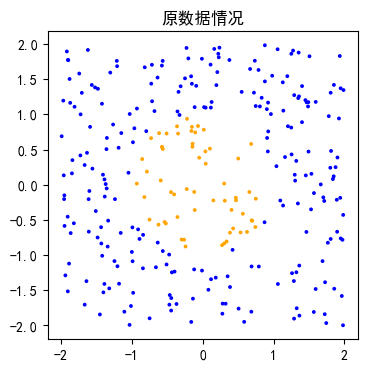

In [45]:
# 图形直观可视化
plot_data(data,'原数据情况')

## 调用数据进行推理：分类函数

输入是：x y  
输出是：橙 蓝

神经网络的输入和输出层都是2

In [46]:
# 分类函数 将概率值转换为分类标签
def classify(probabilities):
    classification = np.rint(probabilities[:,1]) # 四舍五入
    return classification

In [47]:
inputs = data[:,:2] # 数据集(只要前2列)
targets = np.copy(data[:,2]) # 标答  【copy】

# 神经网络
NETWORK_SHAOE = [2,8,5,6,2]
network = Network(NETWORK_SHAOE) # 建立一个神经网络对象
outputs = network.network_forward(inputs) # 神经网络 前向传播运算
outputs[-1][:30]

array([[0.02927289, 0.97072711],
       [0.01597477, 0.98402523],
       [0.01673946, 0.98326054],
       [0.01519266, 0.98480734],
       [0.01734378, 0.98265622],
       [0.02927289, 0.97072711],
       [0.02894872, 0.97105128],
       [0.00560599, 0.99439401],
       [0.01146822, 0.98853178],
       [0.02927289, 0.97072711],
       [0.02927289, 0.97072711],
       [0.02927289, 0.97072711],
       [0.02927289, 0.97072711],
       [0.01646531, 0.98353469],
       [0.02575024, 0.97424976],
       [0.02927289, 0.97072711],
       [0.02927289, 0.97072711],
       [0.02913437, 0.97086563],
       [0.01673946, 0.98326054],
       [0.01462601, 0.98537399],
       [0.01673946, 0.98326054],
       [0.01287165, 0.98712835],
       [0.01673946, 0.98326054],
       [0.0111829 , 0.9888171 ],
       [0.0167044 , 0.9832956 ],
       [0.02927289, 0.97072711],
       [0.01539538, 0.98460462],
       [0.0137757 , 0.9862243 ],
       [0.01603045, 0.98396955],
       [0.02927289, 0.97072711]])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


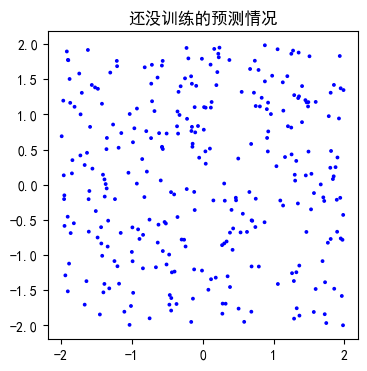

In [48]:
# 需要将概率转化为标签
classification = classify(outputs[-1]) 
data_pre = np.copy(data)
data_pre[:,2] = classification 

print(data_pre[:,2]) # 预测与实际有很大差距 需要定义损失函数迭代运算(训练)
plot_data(data_pre,'还没训练的预测情况')

# 训练：反向传播算法(调整参数)

## 熵损失函数

损失函数越大，准确性越差  
损失：预测、标答 —— 交叉熵

In [49]:
# 熵损失函数
def precise_loss_function(predicted,real): # 预测的 标答的
    real_maxtrix = np.zeros((len(real),2)) # 构造形状
    real_maxtrix[:,1],real_maxtrix[:,0] = real,1-real # 互补的
    
    product = np.sum(predicted*real_maxtrix,axis=1) # 相似程度
    return 1 - product # 损失函数越大准确性越差

## 需求函数(最后一层)

In [50]:
# 需求函数(最后一层)
def get_finalLayer_preAct_demands(predicted_values,target_vector): # 预测的 标答的
    target = np.zeros((len(target_vector),2)) # 构造形状
    target[:,1],target[:,0] = target_vector,1-target_vector # 互补的

    
    # for i in range(len(target_vector)):
    #     if np.dot(target[i],predicted_values[i])>0.5:
    #         target[i] = np.array([0,0])
    #     else:
    #         target[i] = (target[i] - 0.5) * 2 

    for i in range(len(target_vector)):
        target[i] = np.array([0,0]) if np.dot(target[i],predicted_values[i])>0.5 else (target[i] - 0.5) * 2 

    # target = [(np.array([0, 0]) if np.dot(target[i],predicted_values[i])>0.5 else (target_vector[i]-0.5)*2) for i in range(len(target_vector))]

    
    return target

In [51]:
loss = precise_loss_function(outputs[-1],targets)[:30]
print(loss)

demands = get_finalLayer_preAct_demands(outputs[-1],targets)[:30]
print(demands)

[0.97072711 0.98402523 0.98326054 0.01519266 0.01734378 0.02927289
 0.02894872 0.00560599 0.01146822 0.02927289 0.02927289 0.97072711
 0.02927289 0.01646531 0.02575024 0.02927289 0.02927289 0.02913437
 0.98326054 0.01462601 0.01673946 0.01287165 0.98326054 0.0111829
 0.9832956  0.97072711 0.01539538 0.0137757  0.98396955 0.97072711]
[[ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]
 [ 0.  0.]
 [ 1. -1.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]
 [ 1. -1.]]


## 层的反向传播：调整矩阵

In [52]:
# 测试调整矩阵的运算
values = np.array([1,2,3,4])
demands = np.array([1,2])

def get_weight_adjust_matrix(values,demands):
    # 保证形状 花乘
    plain_weights = np.full((len(values),len(demands)),1)
    plain_weights_T = plain_weights.T
    print(plain_weights)
    print(plain_weights_T)

    print(plain_weights_T*values)
    
    weight_adjust_matrix = (plain_weights_T*values).T * demands
    return weight_adjust_matrix

get_weight_adjust_matrix(values,demands)

[[1 1]
 [1 1]
 [1 1]
 [1 1]]
[[1 1 1 1]
 [1 1 1 1]]
[[1 2 3 4]
 [1 2 3 4]]


array([[1, 2],
       [2, 4],
       [3, 6],
       [4, 8]])

In [53]:
# 定义一个层的类
class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights = np.random.randn(n_inputs,n_neurons)
        self.biases = np.random.randn(n_neurons)
        # self.output = None
        
    def layer_forward(self,inputs): 
        self.output_linear = np.dot(inputs,self.weights) + self.biases # 只做线性函数计算
        return self.output_linear

    def layer_backward(self,preWeights_values,afterWeights_demands): # 权重矩阵之前的输出值(已知) 权重矩阵之后的需求值(已知)【传播】
        preWeights_demands = np.dot(afterWeights_demands,self.weights.T) # 反向传播 需要转置  【求权重矩阵之前的需求值】
        # 激活函数求导
        condition = (preWeights_values>0)
        value_derivatives = np.where(condition,1,0) # if一条 np.where整个矩阵都处理
        preActs_demands = value_derivatives * preWeights_demands # 【求激活函数之前的需求值】
        # 标准化 避免梯度消失或梯度爆炸
        norm_preActs_demands = normalize(preActs_demands)

        # 调整矩阵 标准化
        weight_adjust_matrix = self.get_weight_adjust_matrix(preWeights_values,afterWeights_demands)
        norm_weight_adjust_matrix = normalize(weight_adjust_matrix)

        return (norm_weight_adjust_matrix,norm_preActs_demands) # 权重调整矩阵 激活函数之前的需求值  【闭环】

    
    def get_weight_adjust_matrix(self,preWeights_values,aftWeights_demands): # 权重调整矩阵 两个向量相乘(前一层的输出值 需求值)
        plain_weights = np.ones_like(self.weights) # 和权重矩阵的形状一样
        weight_adjust_matrix = np.zeros_like(self.weights) # 和权重矩阵的形状一样  很多条数据 权重调整矩阵需求平均
        plain_weights_T = plain_weights.T

        for i in range(BATCH_SIZE): # 批量处理数据  每一条都要进行如下运算
            weight_adjust_matrix += (plain_weights_T*preWeights_values[i,:]).T * aftWeights_demands[i,:] # 第i行的所有列 体现每一条数据
        weight_adjust_matrix = weight_adjust_matrix / BATCH_SIZE # 求和后除数量  即求平均
        return weight_adjust_matrix
        

# 定义一个网络的类
class Network: 
    def __init__(self,network_shape):
        self.shape = network_shape
        self.layers = [] 

        for i in range(len(network_shape)-1):
            layer = Layer(network_shape[i],network_shape[i+1])
            self.layers.append(layer) 

    def network_forward(self,inputs):
        outputs = [inputs] 
        for i in range(len(self.layers)):
            layer_output_linear = self.layers[i].layer_forward(outputs[i]) # 线性函数计算  激活函数输出(标准化函数)
            layer_output = normalize(activation_Relu(layer_output_linear)) if i<len(self.layers)-1 else activation_softmax(layer_output_linear)
            outputs.append(layer_output)
        return outputs


真实数据情况：
 [[ 1.52537412 -1.28615011  1.        ]
 [-1.936026    1.67342035  1.        ]
 [-1.09881213 -0.52289323  1.        ]
 [-0.41075388  0.79345694  0.        ]
 [-1.62116599  0.56132478  1.        ]
 [-1.96436296  0.14079116  1.        ]
 [ 0.94809341 -1.00691265  1.        ]
 [ 1.67122019  0.00589513  1.        ]
 [-1.33822476  1.83730287  1.        ]
 [-1.93539164 -1.23068415  1.        ]]


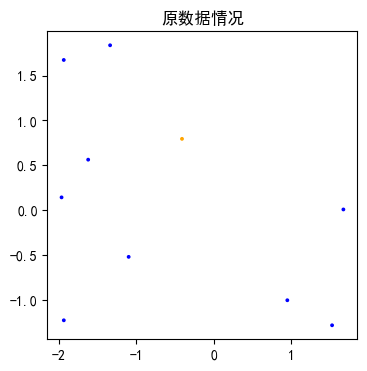


神经网络的预测情况：
 [[0.02860199 0.97139801]
 [0.01400534 0.98599466]
 [0.0075368  0.9924632 ]
 [0.01400534 0.98599466]
 [0.02860199 0.97139801]
 [0.00834384 0.99165616]
 [0.02969189 0.97030811]
 [0.02913605 0.97086395]
 [0.01400534 0.98599466]
 [0.00756476 0.99243524]]

预测的标签情况：
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


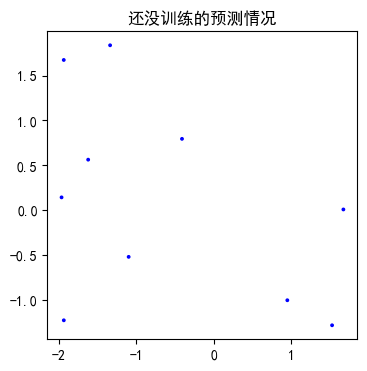


损失函数：
 [0.02860199 0.01400534 0.0075368  0.98599466 0.02860199 0.00834384
 0.02969189 0.02913605 0.01400534 0.00756476]

需求函数：
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]

调整矩阵：
 [[ 0.1        -0.1       ]
 [ 0.03648176 -0.03648176]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.05864081 -0.05864081]]

层的反向传播-(本层)权重调整矩阵：
 [[ 1. -1.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1. -1.]]

层的反向传播-(前一层)激活函数之前的需求值：
 [[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [-1.         -0.47900138 -0.          0.         -0.          0.5987893 ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.        

In [54]:
BATCH_SIZE = 10 # 认为只有30条数据

# 生成数据
NUM_OF_DATA = 10
data = create_data(NUM_OF_DATA)
print('\n真实数据情况：\n',data)
plot_data(data,'原数据情况') # 图形直观可视化

inputs = data[:,:2] # 数据集(只要前2列)
targets = np.copy(data[:,2]) # 标答  【copy】

# 神经网络
NETWORK_SHAOE = [2,8,5,6,2]
network = Network(NETWORK_SHAOE) # 建立一个神经网络对象
outputs = network.network_forward(inputs) # 神经网络 前向传播运算
print('\n神经网络的预测情况：\n',outputs[-1])

# 需要将概率转化为标签 分类函数
classification = classify(outputs[-1]) 
data_pre = np.copy(data)
data_pre[:,2] = classification
print('\n预测的标签情况：\n',data_pre[:,2]) # 预测与实际有很大差距 需要定义损失函数迭代运算(训练)
plot_data(data_pre,'还没训练的预测情况')

# 损失函数和需求函数
loss = precise_loss_function(outputs[-1],targets)
print('\n损失函数：\n',loss)
demands = get_finalLayer_preAct_demands(outputs[-1],targets)
print('\n需求函数：\n',demands)

# 测试神经网络中的调整矩阵  测试成功
adjust_matrix = network.layers[-1].get_weight_adjust_matrix(outputs[-2],demands) # 倒数第二层的输出值即最后一层的输入值  需求值
print('\n调整矩阵：\n',adjust_matrix)

# 测试层的反向传播  测试成功
layer_backward = network.layers[-1].layer_backward(outputs[-2],demands)
print('\n层的反向传播-(本层)权重调整矩阵：\n',layer_backward[0])
print('\n层的反向传播-(前一层)激活函数之前的需求值：\n',layer_backward[1])

## 网络的反向传播

In [60]:
# 定义一个层的类
class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weights = np.random.randn(n_inputs,n_neurons)
        self.biases = np.random.randn(n_neurons)
        # self.output = None
        
    def layer_forward(self,inputs): 
        self.output_linear = np.dot(inputs,self.weights) + self.biases # 只做线性函数计算
        return self.output_linear

    def layer_backward(self,preWeights_values,afterWeights_demands): # 权重矩阵之前的输出值(已知) 权重矩阵之后的需求值(已知)【传播】
        preWeights_demands = np.dot(afterWeights_demands,self.weights.T) 
        condition = (preWeights_values>0)
        value_derivatives = np.where(condition,1,0)
        preActs_demands = value_derivatives * preWeights_demands
        norm_preActs_demands = normalize(preActs_demands)
        
        weight_adjust_matrix = self.get_weight_adjust_matrix(preWeights_values,afterWeights_demands)
        norm_weight_adjust_matrix = normalize(weight_adjust_matrix)
        
        return (norm_weight_adjust_matrix,norm_preActs_demands) # 权重调整矩阵 激活函数之前的需求值  【闭环】

    
    def get_weight_adjust_matrix(self,preWeights_values,aftWeights_demands): # 权重调整矩阵 两个向量相乘(前一层的输出值 需求值)
        plain_weights = np.ones_like(self.weights)
        weight_adjust_matrix = np.zeros_like(self.weights) 
        plain_weights_T = plain_weights.T

        for i in range(BATCH_SIZE): 
            weight_adjust_matrix += (plain_weights_T*preWeights_values[i,:]).T * aftWeights_demands[i,:] 
        weight_adjust_matrix = weight_adjust_matrix / BATCH_SIZE 
        return weight_adjust_matrix
        

# 定义一个网络的类
class Network: 
    def __init__(self,network_shape):
        self.shape = network_shape
        self.layers = [] 

        for i in range(len(network_shape)-1):
            layer = Layer(network_shape[i],network_shape[i+1])
            self.layers.append(layer) 

    # 网络的前馈运算
    def network_forward(self,inputs): 
        outputs = [inputs] 
        for i in range(len(self.layers)):
            layer_output_linear = self.layers[i].layer_forward(outputs[i]) # 线性函数计算  激活函数输出(标准化函数)
            layer_output = normalize(activation_Relu(layer_output_linear)) if i<len(self.layers)-1 else activation_softmax(layer_output_linear)
            outputs.append(layer_output)
        return outputs # 所有层的输出值(列表)

    # 网络的反向传播
    def network_backward(self,layerouts,target_vector): # 所有层的输出值(列表)  目标向量(标答)
        backup_network = copy.deepcopy(self) # 备用网络  各种参数都需要更新  作比较更好就代替否则不
        preAct_demands = get_finalLayer_preAct_demands(layerouts[-1],target_vector) # 最后的输出和标答比较 得到最后一层的需求值
        
        # 迭代循环  5层神经元  4层权重矩阵【0 1 2 3】
        for i in range(len(self.layers)): # len=4    每一个Layer实际上代表两个连续的神经元层之间的连接
            layer = backup_network.layers[len(self.layers) - 1 - i] # 【3 2 1 0】
            
            if i != 0: # 偏置项值  不修正最后一层  防止出现过拟合
                layer.biases += LRARNING_RATE * np.mean(preAct_demands, axis=0) # 把所有条的特征i取平均  学习率
                layer.biases = normalize(layer.biases) # 标准化

            # 更新权重矩阵  迭代层的反向传播！！！
            outputs = layerouts[len(self.layers) - 2 - i] # 【】【倒数第一层的需求值 倒数第二层的输出值】
            weight_adjust_matrix,preAct_demands = layer.layer_backward(outputs,preAct_demands) # 迭代更新！！！
            layer.weights += LRARNING_RATE * weight_adjust_matrix
            layer.weights = normalize(layer.weights) # 标准化

        return backup_network # 经过更新的神经网络


真实数据情况：
 [[-1.07422775 -1.78452795  1.        ]
 [-1.14129366  0.94474014  1.        ]
 [-0.49019553  1.55183614  1.        ]
 [ 1.59366556  1.29887205  1.        ]
 [-1.84402037  1.66272075  1.        ]
 [ 1.9725095  -0.80177096  1.        ]
 [ 0.48136116 -1.23265886  1.        ]
 [ 1.01285618  0.25928809  1.        ]
 [ 0.55184237 -0.59053608  0.        ]
 [-0.74753332  0.56181037  0.        ]]


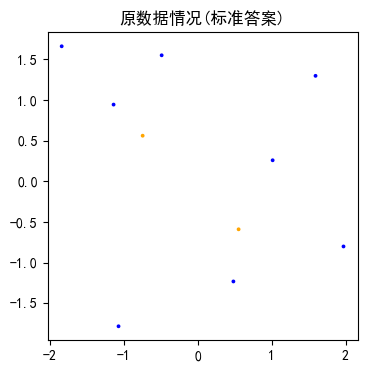


预测的标签情况：
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


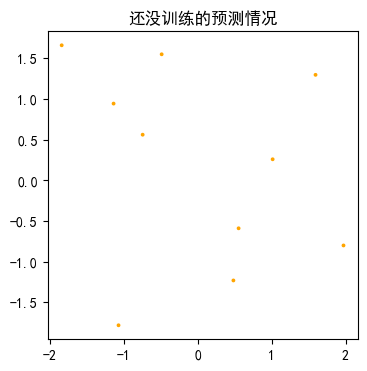

ValueError: operands could not be broadcast together with shapes (10,5) (10,6) 

In [61]:
NETWORK_SHAOE = [2,8,5,6,2] # 神经网络的结构
NUM_OF_DATA = 10 # 生成数据样本数
BATCH_SIZE = 10 # 处理数据的条数
LRARNING_RATE = 0.01 # 学习率(炼丹)


# 生成数据
data = create_data(NUM_OF_DATA)
print('\n真实数据情况：\n',data)
plot_data(data,'原数据情况(标准答案)') 

inputs = data[:,:2] # 数据集(只要前2列)
targets = np.copy(data[:,2]) # 标答  【copy】

# 神经网络
NETWORK_SHAOE = [2,8,5,6,2]
network = Network(NETWORK_SHAOE) # 建立一个神经网络对象
outputs = network.network_forward(inputs) # 神经网络 前向传播运算
# 预测后的分类 可视化呈现
classification = classify(outputs[-1]) 
data[:,2] = classification
print('\n预测的标签情况：\n',data[:,2]) 
plot_data(data,'还没训练的预测情况')

# 神经网络 训练一次
backup_network = network.network_backward(outputs,targets) # 神经网络看 反向传播运算 (备用网络)
new_outputs = backup_network.network_forward(inputs) # 神经网络 前向传播运算
# 预测后的分类 可视化呈现
new_classification = classify(new_outputs[-1]) 
data[:,2] = new_classification
print('\n预测的标签情况：\n',data[:,2]) 
plot_data(data,'训练一次的预测情况')







